In [39]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [3]:
df = pd.read_csv("./data/train.csv")
example_id = df['example_id']
x = df['x']
y = df['TARGET']

In [4]:
df.head(10)

,example_id,x,TARGET
0,0,0.000,0.800000
1,1,0.001,0.800000
2,2,0.002,0.800000
3,3,0.003,0.799999
4,4,0.004,0.799998
5,5,0.005,0.799998
6,6,0.006,0.799996
7,7,0.007,0.799995
8,8,0.008,0.799994
9,9,0.009,0.799992


In [5]:
x.head(5)

0    0.000
1    0.001
2    0.002
3    0.003
4    0.004
Name: x, dtype: float64

error:0.12871690519210963 period:0.5065679070117706 amplitude:0.7483861020154801 constant: 0.07319419345501745 
error:0.004811851682458215 period:0.5095941964776686 amplitude:0.74838689711922 constant: 0.07319445525119843 
error:0.006752293808485845 period:0.5082277202862057 amplitude:0.7483873707521302 constant: 0.07319340321861739 
error:0.0060647111737798885 period:0.5030633773251386 amplitude:0.7483868090531921 constant: 0.07319359097670891 
error:0.003775069098154756 period:0.49933696889757045 amplitude:0.7483860360582754 constant: 0.07319362310074745 
error:0.002722067559704587 period:0.4997827554817839 amplitude:0.7483860018389289 constant: 0.07319355501094515 
error:0.0029130734195391365 period:0.4958823776147833 amplitude:0.7483857099929792 constant: 0.0731938636240703 
error:0.002212522725119888 period:0.496097480206098 amplitude:0.7483859986616416 constant: 0.07319415684464947 
error:0.002250370657965811 period:0.49957607867140325 amplitude:0.7483860307914428 constant: 0.073

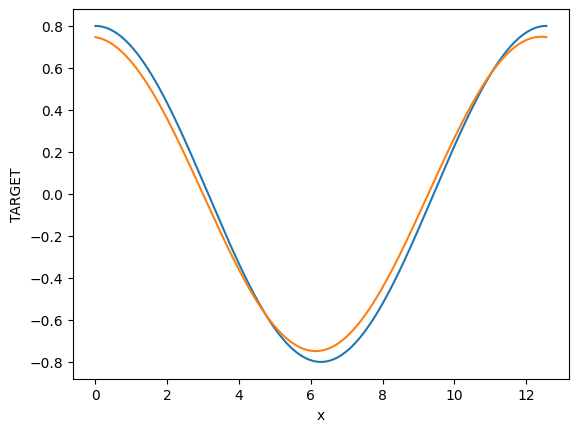

error:0.0031702802321391184 period:0.498882980771422 amplitude:0.7483850660295017 constant: 0.07319410246132663 
error:0.002687065746159463 period:0.499325889496561 amplitude:0.7483846779111868 constant: 0.0731940523139075 
error:0.002808777548832017 period:0.49808411658970586 amplitude:0.7483851464951075 constant: 0.07319408656099385 
error:0.0024801604274180644 period:0.49811603648486186 amplitude:0.7483847814318882 constant: 0.07319412841002557 
error:0.0025413206696339296 period:0.49898382884509823 amplitude:0.7483844605772352 constant: 0.07319438586810262 
error:0.0027023780672930124 period:0.4992319129916298 amplitude:0.7483842982441811 constant: 0.07319428515206032 
error:0.002746894928768258 period:0.4971742127684628 amplitude:0.7483846332629133 constant: 0.07319362577465532 
error:0.0025125227300045816 period:0.49691382197146355 amplitude:0.7483847076815068 constant: 0.07319364854074334 
error:0.0023074562599731323 period:0.49580646749557866 amplitude:0.7483846015268127 consta

In [270]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b*x + c) + d

lr = 0.00001
n = len(x)
batch = 305
epochs = 57

rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0

    if i == 10 or i == 400 or i == 1000 or i == 4000:
        data_yhat = []
        a_final = rsl[-1][0]
        b_final = rsl[-1][1]
        c_final = rsl[-1][2]
        for value in x:
            data_yhat.append(y_predict(a_final, b_final, c_final, d, value))
        plt.plot(x,y,label="Datos Originales")
        plt.plot(x, data_yhat, label="Datos a Predecir")
        plt.xlabel("x")
        plt.ylabel("TARGET")
        plt.show()
    for m in range(batch):
        ix = int(random.uniform(0,n))
        e +=  (y[ix] - y_predict(a,b,c,d,x[ix]))* (y[ix] - y_predict(a,b,c,d,x[ix]))
        a_gradiente += -2*e*math.cos(b*ix+c)
        b_gradiente += 2*e*a*math.sin(b*ix+c)*ix
        c_gradiente += 2*e*a*math.sin(b*ix*c)

    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch

    e = e/batch
    rsl.append([a,b,c,d,e])
    print(f"error:{e} period:{b} amplitude:{a} constant: {c} ")


In [209]:
x_min = x.min().min()
long_s = [ y_predict(a,b,c,d,xi) for xi in np.arange(x_min , 20*math.pi, 0.001).astype(np.float32)]
long_s

[0.5614717614342265,
 0.561631623433061,
 0.5617913449082902,
 0.5619509258013817,
 0.5621103661281156,
 0.5622696657372803,
 0.5624288247373774,
 0.5625878430143721,
 0.5627467205284771,
 0.5629054570921705,
 0.5630640529614059,
 0.5632225079486008,
 0.5633808220141089,
 0.5635389951183191,
 0.5636970272216554,
 0.5638549181375954,
 0.5640126682675793,
 0.5641702771311917,
 0.5643277445428047,
 0.5644850710496319,
 0.5646422563188712,
 0.5647993003111942,
 0.5649562029873073,
 0.5651129643079525,
 0.5652695842339074,
 0.5654260627259844,
 0.5655823997450319,
 0.5657385952519333,
 0.5658946492076075,
 0.5660505612827315,
 0.5662063320191139,
 0.5663619610872384,
 0.5665174487376518,
 0.5666727940629926,
 0.5668279981818074,
 0.5669830598989049,
 0.5671379797539311,
 0.5672927582844538,
 0.567447394298559,
 0.5676018889096857,
 0.5677562409281063,
 0.567910451465215,
 0.5680645193334719,
 0.568218445642225,
 0.5683722292061232,
 0.5685258711324676,
 0.5686793702380969,
 0.56883272705722

In [273]:
sd.play(long_s)